# Smart marketers understand the importance of “know thy customer.” Instead of simply focusing on generating more clicks, marketers must follow the paradigm shift from increased CTRs (Click-Through Rates) to retention, loyalty, and building customer relationships.

### Instead of analyzing the entire customer base as a whole, it’s better to segment them into homogeneous groups, understand the traits of each group, and engage them with relevant campaigns rather than segmenting on just customer age or geography.

###  One of the most popular, easy-to-use, and effective segmentation methods to enable marketers to analyze customer behavior is RFM analysis.

RFM:

Recency: how recently a customer has purchased

Frequency: how often they purchased

Monetary: how much the customer spends

## Importing all the necessary libraries

In [1]:
#importing all relevant liabraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [77]:
df=pd.read_excel("/content/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [78]:
# will  check the shape of our data
df.shape

(541909, 8)

In [79]:
# checking the general information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [80]:
# checking the null values present in our dataset:

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# observation:   and data cleaning activity:



In [81]:
#1) description column has 1454 null values
#2) customer id has around 1 lakh datas

In [82]:
df=df.dropna(subset=["CustomerID"])

In [83]:
df.isnull().sum()  # after dropping the null values

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [84]:
df.shape      # checking the shape of data aftre dropping the null values

(406829, 8)

## checking and cleaning duplicates data

In [85]:
df.duplicated().sum()

5225

In [86]:
df.drop_duplicates()    # dropping the duplicates data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [87]:
# checking the statistical description of our dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [88]:
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]   # excluding quantity with neg value and price with o value
df.shape

(397884, 8)

In [89]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [90]:
# creating a column called total sum which is a multiplication of unit price and quantity
df["totalsum"]=df["Quantity"]*df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalsum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## 1) monetary(M)

for calculation of monetary we need to consider quantity * unit price

In [91]:

monetary_contributed = df.groupby('CustomerID')['totalsum'].sum()
monetary_contributed = monetary_contributed.reset_index()
monetary_contributed.head(10)

,CustomerID,totalsum
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
5,12352.0,2506.04
6,12353.0,89.00
7,12354.0,1079.40
8,12355.0,459.40
9,12356.0,2811.43


In [93]:
monetary_contributed.sort_values(by="totalsum",ascending=False).head()  # sorting the total sum in descending order

,CustomerID,totalsum
1689,14646.0,280206.02
4201,18102.0,259657.30
3728,17450.0,194550.79
3008,16446.0,168472.50
1879,14911.0,143825.06


## 2) frequency(F)

for frequency we need to consider number of purchase, here we can consider invoice number

In [94]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [95]:
frequency.sort_values(by="InvoiceNo",ascending =False).head()   # sorting invoice count in descending order

,CustomerID,InvoiceNo
4010,17841.0,7847
1879,14911.0,5675
1289,14096.0,5111
326,12748.0,4595
1661,14606.0,2700


## 3) Recency(R): deals with purchase date 

In [96]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalsum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [97]:
# here for recency we can consider date of invoice

In [98]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [99]:
df['duration'] = df['InvoiceDate'].max() - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalsum,duration
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [100]:
recency=df.groupby("CustomerID")["duration"].min()
recency=recency.reset_index()
recency.head()

,CustomerID,duration
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [101]:
recency.sort_values(by="duration",ascending=False).head()  # sorting this duration in descending order wrt to customerid

,CustomerID,duration
4180,18074.0,373 days 02:57:00
1037,13747.0,373 days 02:13:00
355,12791.0,373 days 01:23:00
4064,17908.0,373 days 01:05:00
3103,16583.0,373 days 00:47:00


In [102]:

recency.shape,monetary_contributed.shape,frequency.shape

((4338, 2), (4338, 2), (4338, 2))

In [124]:
#merging recency table, |monetary_contributed , and frequency table to check rfm
rf = pd.merge(monetary_contributed, frequency, on='CustomerID', how='inner')   # merging with respect to inner join
rfm = pd.merge(rf, recency, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'revenue_monetary', 'frequency', 'recency']
rfm['recency'] = rfm['recency'].dt.days    # taking only the days values from recency table
rfm.head()

,CustomerID,revenue_monetary,frequency,recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [125]:
rfm.shape

(4338, 4)

In [126]:
rfm.head()

,CustomerID,revenue_monetary,frequency,recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [127]:
features=rfm.drop(columns=["CustomerID"])
features.head()

,revenue_monetary,frequency,recency
0,77183.60,1,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [128]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4338 entries, 0 to 4337
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   revenue_monetary  4338 non-null   float64
 1   frequency         4338 non-null   int64  
 2   recency           4338 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


## EDA

<Figure size 720x864 with 0 Axes>

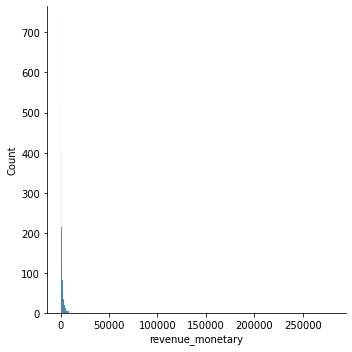

<Figure size 720x864 with 0 Axes>

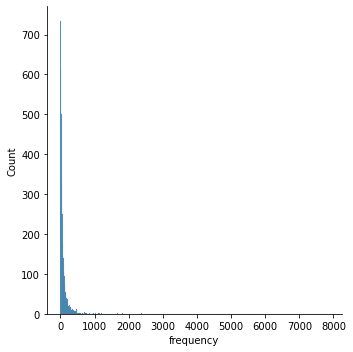

<Figure size 720x864 with 0 Axes>

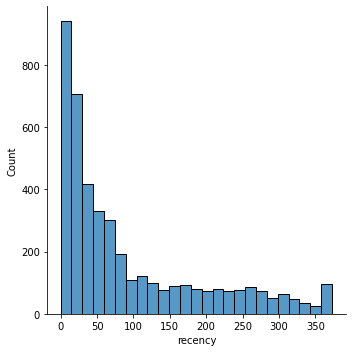

In [129]:
for i in features.columns:
  plt.figure(figsize=(10,12))
  sns.displot(features[i])

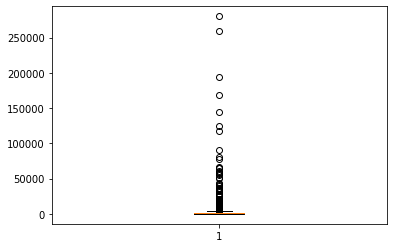

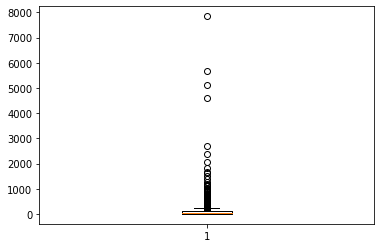

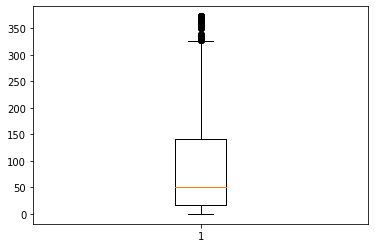

In [130]:
for i in features.columns:
  plt.boxplot(features[i])
  plt.show()

In [136]:
rfm.head()

,CustomerID,revenue_monetary,frequency,recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


## removing the outliers

In [139]:
q1_rev_mon = features['revenue_monetary'].quantile(0.05)
q3_rev_mon= features['revenue_monetary'].quantile(0.95)
IQR = q3_rev_mon - q1_rev_mon
features = features[(features['revenue_monetary'] >= q1_rev_mon - 1.5*IQR) & (features['revenue_monetary'] <= q3_rev_mon + 1.5*IQR)]

q1_freq = features['frequency'].quantile(0.05)
q3_freq = features['frequency'].quantile(0.95)
IQR = q3_freq - q1_freq
features = features[(features['frequency'] >= q1_freq - 1.5*IQR) & (features['frequency'] <= q3_freq + 1.5*IQR)]

q1_rec = features['recency'].quantile(0.05)
q3_rec = features['recency'].quantile(0.95)
IQR = q3_rec - q1_rec
features = features[(features['recency'] >= q1_rec - 1.5*IQR) & (features['recency'] <= q3_rec + 1.5*IQR)]

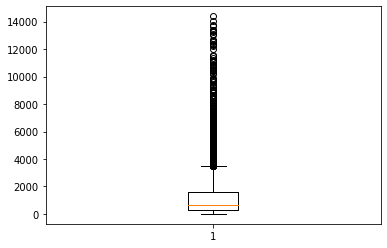

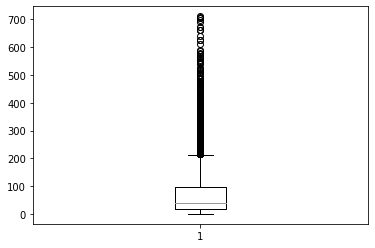

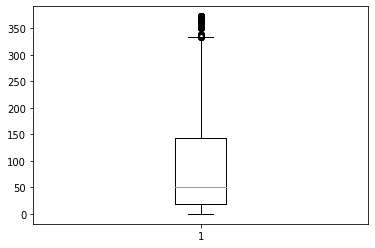

In [140]:
for i in features.columns:
  plt.boxplot(features[i])
  plt.show()

## scaling our data of recency, frequency and revenue

In [143]:
# here we are doing scaling of data by standardisation
scale=StandardScaler()
features[["revenue_monetary","frequency","recency"]]=scale.fit_transform(features[["revenue_monetary","frequency","recency"]])

In [146]:
features.head()

,revenue_monetary,frequency,recency
1,1.645464,1.067693,-0.918021
2,0.261938,-0.460713,-0.189452
3,0.240085,-0.035593,-0.748354
4,-0.543502,-0.602419,2.155942
5,0.652204,0.085870,-0.578687


## now model building( Hierarchical Clustering)

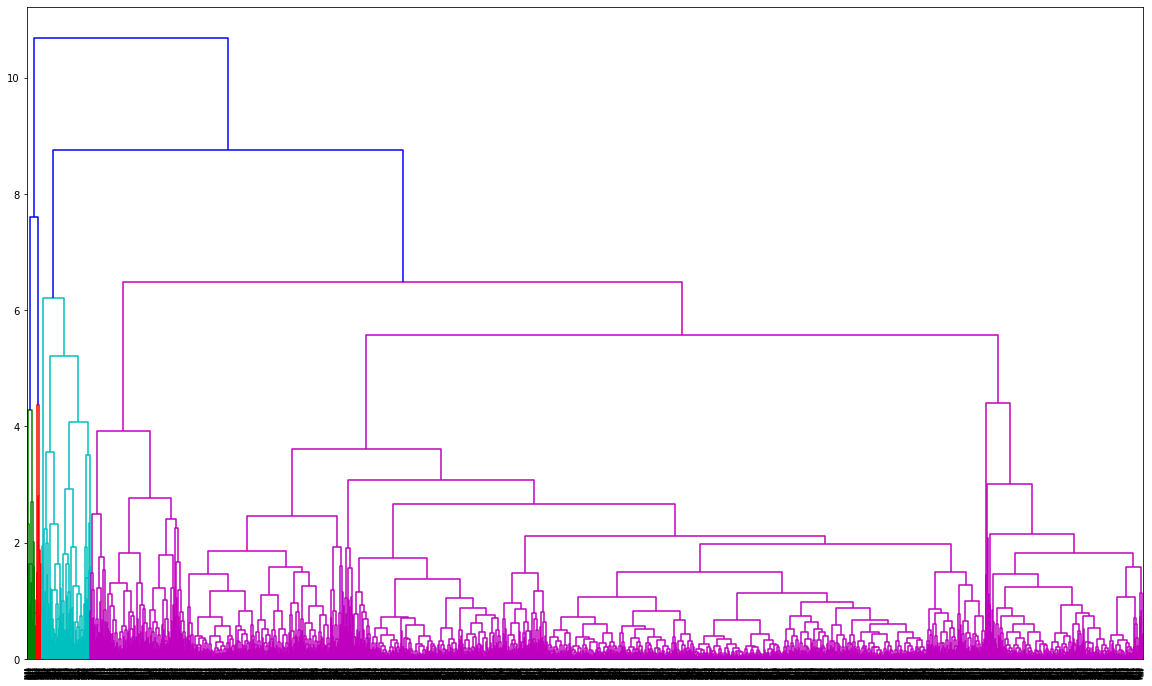

In [148]:
# complete linkage
plt.figure(figsize=(20,12))

mergings = linkage(features, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [149]:
# clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [150]:
cluster_labels.shape

(4256,)

In [156]:
# assign cluster labels
pd.set_option('display.max_rows', None)
rfm['cluster_labels'] = cluster_labels


In [160]:
rfm.head(10)

,CustomerID,revenue_monetary,frequency,recency,cluster_labels
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,0
5,12352.0,2506.04,85,35,0
6,12353.0,89.00,4,203,0
7,12354.0,1079.40,58,231,0
8,12355.0,459.40,13,213,0
9,12356.0,2811.43,59,22,0
10,12357.0,6207.67,131,32,1


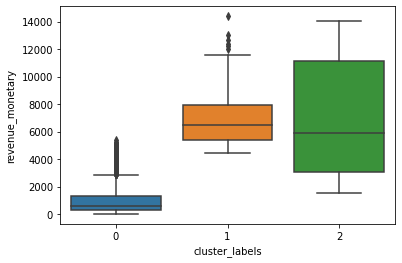

In [163]:
# plotting and visualizing the classes:
sns.boxplot(x='cluster_labels', y=rfm["revenue_monetary"], data=rfm)


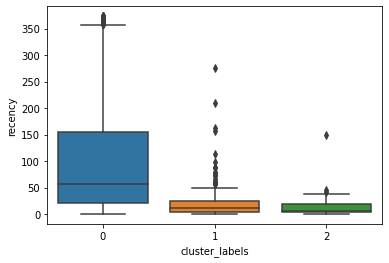

In [164]:
sns.boxplot(x='cluster_labels', y=rfm["recency"], data=rfm)

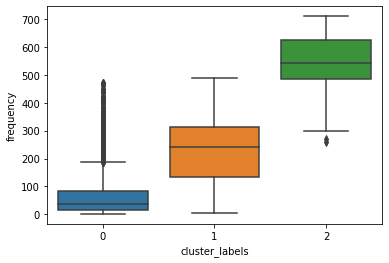

In [165]:
sns.boxplot(x='cluster_labels', y=rfm["frequency"], data=rfm)